In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
data = load_iris()

In [6]:
iris_data = pd.DataFrame(data = np.c_[data['data'], data['target']], columns = data['feature_names']+['target'])
iris_data['target'] = iris_data['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

In [7]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
iris_data.loc[:,'index'] = np.arange(1, 151, 1)

In [12]:
iris_data = iris_data[['index', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']]

In [19]:
iris_data = iris_data.rename(columns = {'index': 'id'})

In [20]:
iris_data

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [23]:
print('품종 종류:', iris_data['target'].unique(), sep = '\n')

품종 종류:
['setosa' 'versicolor' 'virginica']


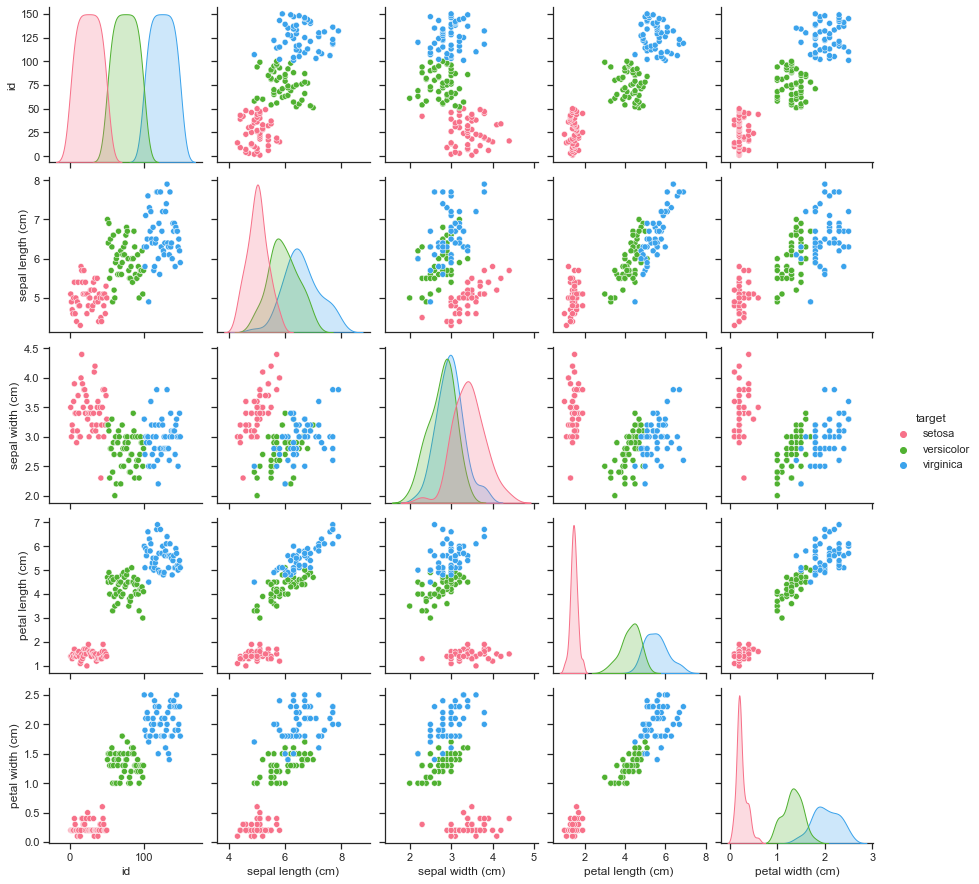

In [27]:
import seaborn as sns
sns.set(style='ticks', color_codes = True)
g = sns.pairplot(iris_data, hue='target', palette = 'husl') # pairplot: 데이터프레임을 인수로 받아 데이터프레임의 각 열의 조합에 따라 산점도를 그림

c:\programdata\anaconda3\envs\pr_tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


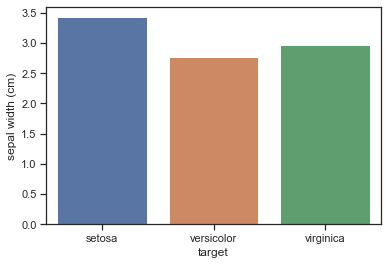

In [28]:
sns.barplot(iris_data['target'], iris_data['sepal width (cm)'], ci = None)
# 각 종과 특성에 대한 연관 관계

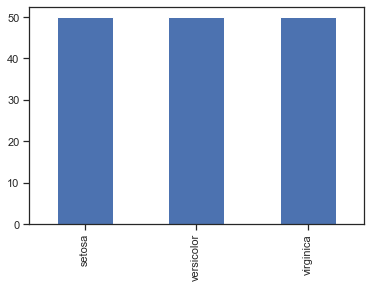

In [31]:
import matplotlib.pyplot as plt
iris_data['target'].value_counts().plot(kind= 'bar') # 정확히 50개씩 있음

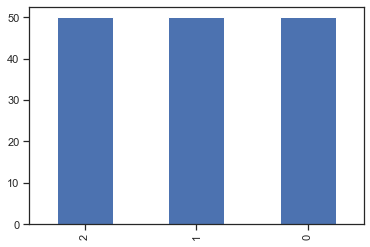

In [33]:
iris_data['target'] = iris_data['target'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
iris_data['target'].value_counts().plot(kind = 'bar')

In [34]:
from sklearn.model_selection import train_test_split
data_X = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
# X(입력)에 해당하는 건 총 4개
data_y = iris_data['target'].values
# y 데이터에 해당 (예측해야하는 값)

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size = 0.8, random_state = 1)

from tensorflow.keras.utils import to_categorical # 원핫인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


### 소프트맥스 회귀


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

model = Sequential()
model.add(Dense(3, input_dim=4, activation = 'softmax'))
# 출력의 차원이 3! (소프트맥스 함수: 출력 시 각 class에 대한 확률값을 줌)
sgd=optimizers.SGD(lr=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# optimizer adam: 경사하강법의 일종

history = model.fit(X_train, y_train, batch_size = 1, epochs = 200, validation_data = (X_test, y_test))

Epoch 1/200
120/120 [==============================] - 0s 2ms/step - loss: 3.5480 - accuracy: 0.3083 - val_loss: 3.2685 - val_accuracy: 0.4333
Epoch 2/200
120/120 [==============================] - 0s 1ms/step - loss: 2.5702 - accuracy: 0.5667 - val_loss: 2.6960 - val_accuracy: 0.5333
Epoch 3/200
120/120 [==============================] - 0s 1ms/step - loss: 2.1087 - accuracy: 0.6250 - val_loss: 2.3231 - val_accuracy: 0.3000
Epoch 4/200
120/120 [==============================] - 0s 975us/step - loss: 1.7588 - accuracy: 0.5000 - val_loss: 1.9120 - val_accuracy: 0.3000
Epoch 5/200
120/120 [==============================] - 0s 975us/step - loss: 1.4375 - accuracy: 0.4917 - val_loss: 1.5694 - val_accuracy: 0.3000
Epoch 6/200
120/120 [==============================] - 0s 1000us/step - loss: 1.1932 - accuracy: 0.5000 - val_loss: 1.3407 - val_accuracy: 0.2667
Epoch 7/200
120/120 [==============================] - 0s 1ms/step - loss: 1.0502 - accuracy: 0.5083 - val_loss: 1.2058 - val_accuracy:

120/120 [==============================] - 0s 958us/step - loss: 0.3131 - accuracy: 0.9583 - val_loss: 0.3932 - val_accuracy: 0.8000
Epoch 58/200
120/120 [==============================] - 0s 975us/step - loss: 0.3120 - accuracy: 0.9417 - val_loss: 0.3746 - val_accuracy: 0.8667
Epoch 59/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3076 - accuracy: 0.9583 - val_loss: 0.3628 - val_accuracy: 0.9333
Epoch 60/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3083 - accuracy: 0.9667 - val_loss: 0.3660 - val_accuracy: 0.9333
Epoch 61/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3033 - accuracy: 0.9583 - val_loss: 0.3695 - val_accuracy: 0.8667
Epoch 62/200
120/120 [==============================] - 0s 983us/step - loss: 0.3002 - accuracy: 0.9667 - val_loss: 0.3552 - val_accuracy: 0.9333
Epoch 63/200
120/120 [==============================] - 0s 958us/step - loss: 0.2988 - accuracy: 0.9750 - val_loss: 0.3594 - val_accuracy: 0.93

120/120 [==============================] - 0s 967us/step - loss: 0.2135 - accuracy: 0.9750 - val_loss: 0.2694 - val_accuracy: 0.9333
Epoch 114/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9750 - val_loss: 0.2664 - val_accuracy: 0.9333
Epoch 115/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2132 - accuracy: 0.9667 - val_loss: 0.2745 - val_accuracy: 0.9333
Epoch 116/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2114 - accuracy: 0.9833 - val_loss: 0.2734 - val_accuracy: 0.9333
Epoch 117/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2105 - accuracy: 0.9833 - val_loss: 0.2739 - val_accuracy: 0.9333
Epoch 118/200
120/120 [==============================] - 0s 991us/step - loss: 0.2103 - accuracy: 0.9750 - val_loss: 0.2659 - val_accuracy: 0.9333
Epoch 119/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2082 - accuracy: 0.9750 - val_loss: 0.2655 - val_accuracy: 0.

120/120 [==============================] - 0s 1ms/step - loss: 0.1683 - accuracy: 0.9667 - val_loss: 0.2234 - val_accuracy: 0.9333
Epoch 170/200
120/120 [==============================] - 0s 983us/step - loss: 0.1656 - accuracy: 0.9750 - val_loss: 0.2141 - val_accuracy: 0.9667
Epoch 171/200
120/120 [==============================] - 0s 1000us/step - loss: 0.1642 - accuracy: 0.9667 - val_loss: 0.2132 - val_accuracy: 0.9667
Epoch 172/200
120/120 [==============================] - 0s 1000us/step - loss: 0.1641 - accuracy: 0.9667 - val_loss: 0.2061 - val_accuracy: 0.9667
Epoch 173/200
120/120 [==============================] - 0s 975us/step - loss: 0.1637 - accuracy: 0.9750 - val_loss: 0.2042 - val_accuracy: 0.9667
Epoch 174/200
120/120 [==============================] - 0s 1000us/step - loss: 0.1631 - accuracy: 0.9833 - val_loss: 0.2050 - val_accuracy: 0.9667
Epoch 175/200
120/120 [==============================] - 0s 958us/step - loss: 0.1631 - accuracy: 0.9750 - val_loss: 0.2083 - val_a

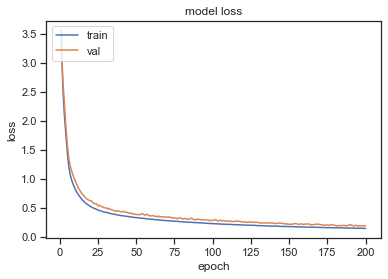

In [39]:
# 에포크에 따른 정확도 시각화

epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [40]:
print('테스트 정확도: {:.4f}'.format(model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 959us/step - loss: 0.1947 - accuracy: 0.9667
테스트 정확도: 0.9667
